## Dependencies

In [1]:
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt

## Preparing the Data Set for Machine Learning

In [2]:
#Read in CSVs
yeardata_df = pd.read_csv('new_dataset_clipped.csv', encoding = "utf-8")
attributes_df = pd.read_csv('FIFA_attributes.csv', encoding='ISO-8859-1')
rank_stand_df = pd.read_csv('World_cup_ranking_placement.csv')

In [3]:
#Inspect and modify yeardata_df
yeardata_df['Win_Percent'] = yeardata_df['Wins']/yeardata_df['Ttl_Games']
yeardata_df.head(2)

,Unnamed: 0,Country,Year,Wins,Losses,Draws,Points_Scored,Points_Against,Ttl_Games,Win_Percent
0,133,Scotland,2005,2,3,4,11,8,9,0.222222
1,280,England,2005,7,3,1,19,11,11,0.636364


In [4]:
#Inspect and modify attributes_df
attributes_df.rename(columns={"Name":"Country"},inplace=True)
attributes_df.head(2)

,Year,Country,ATT,MID,DEF,OVR
0,2018,Spain,84,86,86,86
1,2018,Brazil,86,83,85,85


In [5]:
#Merge yeardata_df and attributes_df
total_info_df = pd.merge(yeardata_df, attributes_df, on=('Country', 'Year'))
total_info_df.head(2)

,Unnamed: 0,Country,Year,Wins,Losses,Draws,Points_Scored,Points_Against,Ttl_Games,Win_Percent,ATT,MID,DEF,OVR
0,133,Scotland,2005,2,3,4,11,8,9,0.222222,73,76,78,77
1,280,England,2005,7,3,1,19,11,11,0.636364,89,88,88,88


In [6]:
# Drop the Unnamed:0 column
total_info_df = total_info_df.drop('Unnamed: 0', axis=1)

In [7]:
#Merge total_info_df with rank_stand_df
placement_merge = pd.merge(total_info_df, rank_stand_df, on = ("Year", "Country"), how='outer')

In [8]:
placement_merge = placement_merge.fillna(0)
placement_merge.head(2)

,Country,Year,Wins,Losses,Draws,Points_Scored,Points_Against,Ttl_Games,Win_Percent,ATT,MID,DEF,OVR,Index,WC_Finals,WC_Qual,WC_Placement,FIFA_Ranking_PreWC
0,Scotland,2005,2.0,3.0,4.0,11.0,8.0,9.0,0.222222,73.0,76.0,78.0,77.0,0.0,0,0,0.0,0.0
1,England,2005,7.0,3.0,1.0,19.0,11.0,11.0,0.636364,89.0,88.0,88.0,88.0,1.0,0,0,0.0,0.0


In [9]:
placement_merge.to_csv("FIFA_placement_merge_dp.csv")

## Multiple Linear Regression

In [10]:
#Filter the placement_merge dataframe to only the World Cup Years (2006, 2010, 2014)

placement_WCyears = placement_merge.loc[placement_merge['Year'].isin([2006,2010,2014])]
placement_WCyears.sample(5)

,Country,Year,Wins,Losses,Draws,Points_Scored,Points_Against,Ttl_Games,Win_Percent,ATT,MID,DEF,OVR,Index,WC_Finals,WC_Qual,WC_Placement,FIFA_Ranking_PreWC
221,South Africa,2010,8.0,3.0,6.0,26.0,10.0,17.0,0.470588,72.0,70.0,70.0,72.0,221.0,0,1,20.0,83.0
223,Slovenia,2010,4.0,5.0,2.0,20.0,10.0,11.0,0.363636,74.0,69.0,68.0,70.0,223.0,0,1,18.0,25.0
196,France,2010,4.0,7.0,2.0,13.0,13.0,13.0,0.307692,85.0,84.0,83.0,83.0,196.0,0,1,29.0,9.0
63,Turkey,2006,2.0,5.0,6.0,22.0,12.0,13.0,0.153846,75.0,76.0,70.0,73.0,63.0,0,0,0.0,0.0
359,Switzerland,2014,6.0,4.0,1.0,20.0,12.0,11.0,0.545455,74.0,76.0,77.0,76.0,359.0,0,1,11.0,6.0


In [11]:
# Assign X (data) and y (target)

X = placement_WCyears[["Win_Percent","ATT","MID","DEF","FIFA_Ranking_PreWC"]]
y = placement_WCyears["WC_Placement"].values.reshape(-1, 1)
print(X.shape, y.shape)

(157, 5) (157, 1)


"Wins" or "Points Scored" is not used in the model because it is dependent on the Total Games.  The more team games played, the higher the total points scored.  A team is not necessarily better because they played more games.  To normalize the varying number of games played, we used the percentage of games won in the model.

OVR is not included in the model is because OVR is an overal composite score based on the other three stats (ATT, MID, and DEF) which was are including in the model.  

In [12]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
# Create a StandardScater model and fit it to the training data

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [14]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [15]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Make predictions using the X_test_scaled data

In [16]:
predictions = model.predict(X_test_scaled)

## Plot y_test_scaled vs. predictions

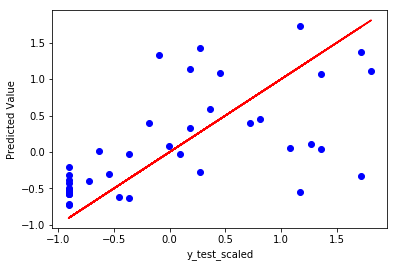

In [17]:
plt.scatter(y_test_scaled, predictions, c='blue')
plt.xlabel('y_test_scaled')
plt.ylabel('Predicted Value')
plt.plot(y_test_scaled, y_test_scaled, c='red')
plt.savefig('predicted_test_multivar.png')

There is quite a variation in how the y_test_scaled approximates the predicted value. If the model was perfect, the y_test_scaled value = predicted value and result i the red line.

In [18]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5259877146958498, R2: 0.35260488568785187


A "good" MSE score will be close to zero while a "good" [R2 Score](https://en.wikipedia.org/wiki/Coefficient_of_determination) will be close to 1.

# Plot the Residuals
Residuals are the difference between the true values of y and the predicted values of y.


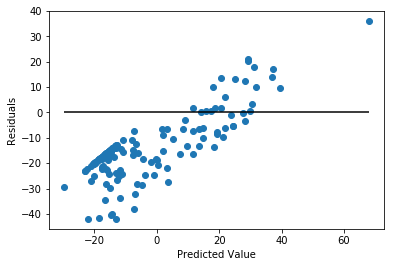

In [19]:
predictions = model.predict(X)
plt.scatter(predictions, predictions - y)
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.savefig('predicted_residuals_multivar.png')

There seems to be a relationship between the predicted values and the residuals.  This means that our model is not very good. A good model would have randomly distributed residual values across predicted values.  It is likely that our model is missing one or more important variables.

 ## World Cup Placement and Individual Variables

Since our model with multiple variables is not a great model. Let's inspect each variable's correlation with the outcome.

In [20]:
# Use the linregress fuction from scipy stats library
from scipy import stats

#### Win_Percent during the regular season of the World Cup year

r-squared: 0.144883714114


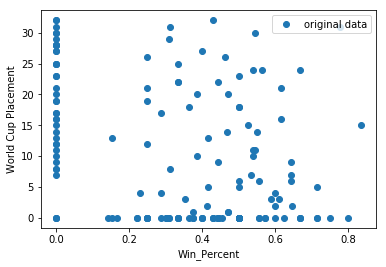

In [21]:
x = placement_WCyears['Win_Percent']
y = placement_WCyears['WC_Placement']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("r-squared:", r_value**2)

plt.plot(x, y, 'o', label='original data')
# plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.xlabel('Win_Percent')
plt.ylabel('World Cup Placement')
plt.legend()
plt.savefig('WCplacement_win_percent.png')

#### FIFA Statistic: ATT (Attack)

r-squared: 0.251945200659


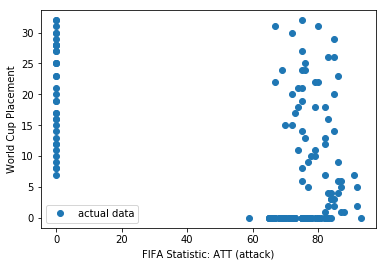

In [22]:
x = placement_WCyears['ATT']
y = placement_WCyears['WC_Placement']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("r-squared:", r_value**2)

plt.plot(x, y, 'o', label='actual data')
# plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.xlabel('FIFA Statistic: ATT (attack)')
plt.ylabel('World Cup Placement')
plt.legend()
plt.savefig('WCplacement_ATT.png')

#### FIFA Statistic: MID (Midfield)

r-squared: 0.251450289474


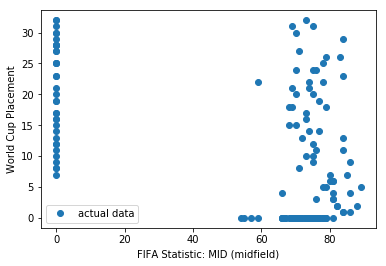

In [23]:
x = placement_WCyears['MID']
y = placement_WCyears['WC_Placement']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("r-squared:", r_value**2)

plt.plot(x, y, 'o', label='actual data')
# plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.xlabel('FIFA Statistic: MID (midfield)')
plt.ylabel('World Cup Placement')
plt.legend()
plt.savefig('WCplacement_MID.png')

#### FIFA Statistic: DEF(Defense)

r-squared: 0.251601531358


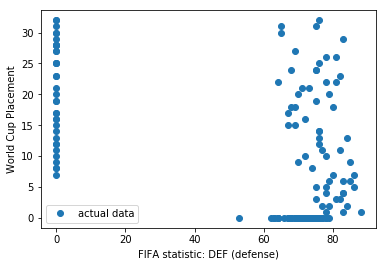

In [24]:
x = placement_WCyears['DEF']
y = placement_WCyears['WC_Placement']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("r-squared:", r_value**2)

plt.plot(x, y, 'o', label='actual data')
# plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.xlabel('FIFA statistic: DEF (defense)')
plt.ylabel('World Cup Placement')
plt.legend()
plt.savefig('WCplacement_DEF.png')

#### FIFA Statistic: OVR (Overall)

r-squared: 0.25495183919


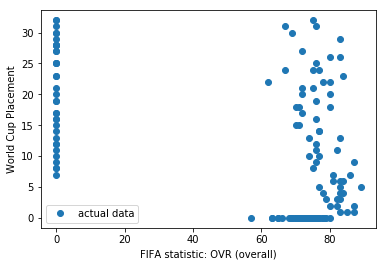

In [25]:
x = placement_WCyears['OVR']
y = placement_WCyears['WC_Placement']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("r-squared:", r_value**2)

plt.plot(x, y, 'o', label='actual data')
# plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.xlabel('FIFA statistic: OVR (overall)')
plt.ylabel('World Cup Placement')
plt.legend()
plt.savefig('WCplacement_OVR.png')

#### FIFA Ranking Pre World Cup

r-squared: 0.503636743353


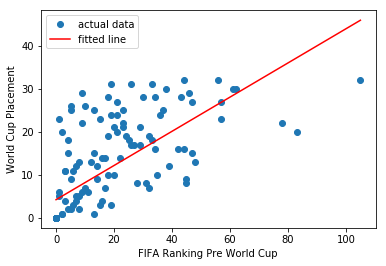

In [26]:
x = placement_WCyears['FIFA_Ranking_PreWC']
y = placement_WCyears['WC_Placement']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("r-squared:", r_value**2)

plt.plot(x, y, 'o', label='actual data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.xlabel('FIFA Ranking Pre World Cup')
plt.ylabel('World Cup Placement')
plt.legend()
plt.savefig('WCplacement_FIFArank.png')

Interstingly, there seems to be no clear correlation between the FIFA statistics (ATT, MID, DEF, OVR) and World Cup placement.  Neither is there a clear correlation between the percentage of wins that a national team has during the regular season.  There dose seem to be some weak or moderate relationship (Rsquared = 0.5) between FIFA Ranking going into the World Cup and World Cup placement.  Let's try testing our model on just this variable

## World Cup Placement and FIFA Ranking: Testing

In [27]:
# Assign X (data) and y (target)

X = placement_WCyears[["FIFA_Ranking_PreWC"]]
y = placement_WCyears["WC_Placement"].values.reshape(-1, 1)
print(X.shape, y.shape)

(157, 1) (157, 1)


In [28]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [29]:
# Create a StandardScater model and fit it to the training data

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [30]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [31]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
predictions = model.predict(X_test_scaled)

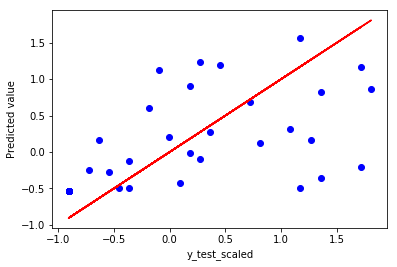

In [33]:
plt.scatter(y_test_scaled, predictions, c='blue')
plt.xlabel('y_test_scaled')
plt.ylabel('Predicted value')
plt.plot(y_test_scaled, y_test_scaled, c='red')
plt.savefig('predicted_test_FIFArank.png')

In [34]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5179213680787325, R2: 0.36253308979674403


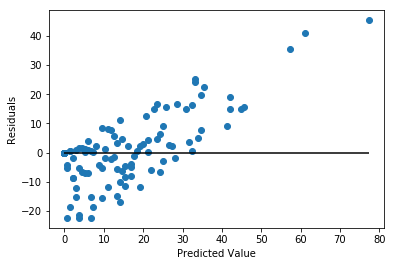

In [35]:
predictions = model.predict(X)
plt.scatter(predictions, predictions - y)
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.savefig('predicted_residuals_FIFArank.png')

This is similar pattern as the model with multiple variables. So our model of with just this one FIFA ranking variable is not perfect. There must be other variables at play.